## Setup

In [59]:
import os
import pathlib
from pathlib import Path
from PIL import Image

import numpy as np
import pandas as pd

In [2]:
data_dir = Path('..') / 'data'

In [27]:
data_dir

PosixPath('../data')

## Load Relevant Data

In [4]:
meme_list = os.listdir(data_dir / 'memes')

In [5]:
len(meme_list)

2505

In [6]:
meme_list[0:2]

['smskater.jpg', 'kd-you-the-real-mvp-f.jpg']

In [7]:
with open(data_dir / "CaptionsClean.txt", "r") as f:
    captions_list = f.read().split('\n')

In [8]:
len(captions_list)

414389

In [9]:
captions_list[0:2]

['y u no - meme generator users y u no give me more upvotes?',
 'y u no - steve jobs y u no respawn?!']

## Clean and Merge

In [10]:
labels = [i.split(' - ')[0].strip().replace(' ', '-') for i in captions_list if i != '']
texts = [j.split(' - ')[1].strip() for j in captions_list if j != '']

In [11]:
df_text = pd.DataFrame({'label':labels, 'text':texts})

In [12]:
df_text['impute_image_name'] = df_text['label'].str.replace(r'[^0-9a-zA-Z -]+', '', regex=True).str.strip().str.replace(' ', '-') + '.jpg'

In [13]:
df_image = pd.DataFrame({'real_image_name':meme_list})

In [14]:
df_match = pd.merge(df_text, df_image, left_on='impute_image_name', right_on='real_image_name', how='outer')
df_mismatch = df_match[df_match['text'].isna() | df_match['real_image_name'].isna()].reset_index()
df_match = df_match.dropna().reset_index(drop=True)
df_match['text'] = '<start> ' + df_match['text'] + ' <end>'

In [15]:
type(data_dir)

pathlib.PosixPath

In [45]:
df_match['image_path'] = str(data_dir) + '/memes/' + df_match['real_image_name']

In [46]:
df_match.shape

(409831, 5)

In [47]:
df_match.head(2)

,label,text,impute_image_name,real_image_name,image_path
0,y-u-no,<start> meme generator users y u no give me mo...,y-u-no.jpg,y-u-no.jpg,../data/memes/y-u-no.jpg
1,y-u-no,<start> steve jobs y u no respawn?! <end>,y-u-no.jpg,y-u-no.jpg,../data/memes/y-u-no.jpg


## See Data

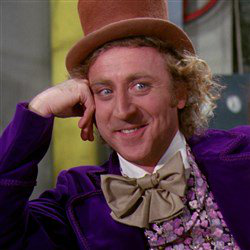

In [65]:
idx = np.random.randint(low=0, high=5000)
Image.open(df_match['image_path'][idx])

## Export File

In [66]:
df_match.to_csv('../data/data_match.csv', index=False)